The following data can be accessed in GA via the "Events" Tab. Methods for cleaning these data are almost the same.


1) Decision Tool Clicks (e.g., brain fog)

2) Decision Filter Clicks (e.g., try-it-yourself)

3) Am I in Menopause results (eg., Perimenopause)


In [73]:
import pandas as pd # Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for Python
import json # JSON encoder and decoder for Python
import re
from functools import reduce
import numpy as np
from math import isnan
import matplotlib.pyplot as plt
import operator
import datetime
import seaborn as sns
from datetime import *

name = "Analytics Pilot View Session Duration and Page Views By ID 20220112-20220116.csv"
pilot_file_loc = "C:/Users/huixin/OneDrive - UC San Diego/menoplan/trial_phase/"
path = pilot_file_loc + "ga_data/" + name

In [31]:
ga_data = pd.read_csv(path, skiprows=5).iloc[:-8,:]
ga_data.head(4)

,IP Address,Session Duration,Sessions
0,24.101.80.217,00:51:09,2.0
1,174.215.189.152,00:45:03,1.0
2,172.58.141.181,00:40:16,1.0
3,73.176.147.18,00:33:44,1.0


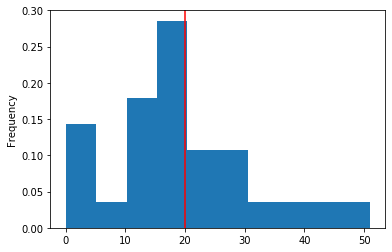

0.5
0.7142857142857143


In [95]:
ga_data = ga_data.rename(columns={'IP Address': 'IPAddress' #'Avg. Time on Page': 'muTimeOnPage'
                                 })
ga_data.head(4)
from datetime import *
#ga_data = ga_data.drop(columns=["Event Value", 'Avg. Value'])
ga_data['durSession'] = pd.to_datetime(ga_data['Session Duration']).dt.minute
eventsPerId = ga_data.groupby(['IPAddress'], as_index=False).agg({'durSession':'mean'})
a= eventsPerId['durSession']
a.plot.hist(weights = np.ones_like(a.index) / len(a.index), bins=10)
plt.axvline(x=20, color='r', linestyle='-')
plt.show()

print(len(a[a>=20])/len(a))
print(len(a[a>=15])/len(a))

In [66]:
#viewsPerPageById.columns = viewsPerPageById.columns.str.strip('/?=')
#viewsPerPageById= viewsPerPageById.rename(columns={"": "homepage"})
eventsPerId = eventsPerId.groupby(['IPAddress', 'Event Label'])['Total Events'].agg("mean").unstack(level=1)
ls = list(eventsPerId.columns)
#ls

r = re.compile('\d*([.,\/]?\d+)')# use regex to find dates
newlist = list(filter(r.match, ls))
newlist.append("Day Index") # create list of dates 
eventsPerId = eventsPerId.drop(columns=newlist) #we do not want the dates

eventsPerId = eventsPerId.fillna(0)
IPAdCol = list(eventsPerId.index)       
IPCol = [x for x in IPAdCol if '.' in x]
eventsPerId = eventsPerId.loc[IPCol]

KeyError: 'Event Label'

In [ ]:
eventsPerId.to_csv(file_loc + "decision_tool_clicks_nov02.csv")

In [ ]:
ga_data = pd.read_csv("C:/Users/huixin/Dropbox/research/menoplan/beta_phase/ga_data/02nov_decision_filter.csv")
ga_data = ga_data.rename(columns={'IP Address': 'IPAddress', 'Avg. Time on Page': 'muTimeOnPage'})
ga_data.head(4)

In [ ]:
#ga_data = ga_data.drop(columns=["Event Value", 'Avg. Value'])

decisionFilPerId = ga_data.groupby(['IPAddress', 'Event Label'], as_index=False).agg({'Total Events':'mean'})
#viewsPerPageById.columns = viewsPerPageById.columns.str.strip('/?=')
#viewsPerPageById= viewsPerPageById.rename(columns={"": "homepage"})
decisionFilPerId = decisionFilPerId.groupby(['IPAddress', 'Event Label'])['Total Events'].agg("mean").unstack(level=1)
ls = list(decisionFilPerId.columns)
#ls

r = re.compile('\d*([.,\/]?\d+)')# use regex to find dates
newlist = list(filter(r.match, ls))
newlist.append("Day Index") # create list of dates 
decisionFilPerId = decisionFilPerId.drop(columns=newlist) #we do not want the dates

decisionFilPerId = decisionFilPerId.fillna(0)
IPAdCol = list(decisionFilPerId.index)       
IPCol = [x for x in IPAdCol if '.' in x]
#decisionFilPerId = decisionFilPerId.groupby(['IPAddress', 'Event Label'])['Total Events'].agg("mean").unstack(level=1)
decisionFilPerId = decisionFilPerId.loc[IPCol]

In [ ]:
decisionFilPerId.to_csv(file_loc + "decision_filter_clicks_nov02.csv")

In [ ]:
ga_data = pd.read_csv("C:/Users/huixin/Dropbox/research/menoplan/beta_phase/ga_data/02nov_am_i_in_menopause_results.csv")
ga_data = ga_data.rename(columns={'IP Address': 'IPAddress', 'Avg. Time on Page': 'muTimeOnPage'})
ga_data.head(4)

In [ ]:
#group data by the same IP and Event Label, and aggregate if there are rows with same IP and Event Label by calculating the mean of those rows
amIinMenopause = ga_data.groupby(['IPAddress', 'Event Label'], as_index=False).agg({'Total Events':'mean'})

In [ ]:
# Pivot a level of the (necessarily hierarchical) index labels
amIinMenopause = amIinMenopause.groupby(['IPAddress', 'Event Label'])['Total Events'].agg("mean").unstack(level=1)

In [ ]:
ls = list(amIinMenopause.columns)
r = re.compile('\d*([.,\/]?\d+)')# use regex to find dates
newlist = list(filter(r.match, ls))
newlist.append("Day Index") # create list of dates 
amIinMenopause = amIinMenopause.drop(columns=newlist) #we do not want the dates

amIinMenopause = amIinMenopause.fillna(0)
IPAdCol = list(amIinMenopause.index)       
IPCol = [x for x in IPAdCol if '.' in x]
amIinMenopause = amIinMenopause.loc[IPCol]

In [ ]:
amIinMenopause.to_csv(file_loc + "am_i_in_menopause_02nov.csv")

In [ ]:
allEventsPerId = pd.concat([decisionFilPerId,  eventsPerId, amIinMenopause])
allEventsPerId.to_csv(file_loc + "allEventsPerId_02nov.csv")